## Hypothesis:

1. Is Price/KM related to City?
2. Does total profits have an increasing trend in month?
3. Are there any relationships between age and customer number?
4. Does people from different income classes have a preference on which company to use?
5. If people use both companies, which company do they prefer more?
6. Which payment method is more preferable in each company?

##### First of all, we load and clean the data.

In [189]:
import pandas as pd
import numpy as np

cab_data = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer_id = pd.read_csv("Customer_ID.csv")
transaction_id = pd.read_csv("Transaction_ID.csv")

In [190]:
import datetime

for i, date in enumerate(cab_data["Date of Travel"]):
    cab_data["Date of Travel"][i] = pd.to_datetime((datetime.date(1899, 12, 30) + datetime.timedelta(days=date)).strftime("%Y%m%d"))

start_date = pd.to_datetime("2016-01-31")
end_date = pd.to_datetime("2018-12-31")

cab_filtered = cab_data[cab_data["Date of Travel"].between(start_date, end_date)]

/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_79693/186971730.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cab_data["Date of Travel"][i] = pd.to_datetime((datetime.date(1899, 12, 30) + datetime.timedelta(days=date)).strftime("%Y%m%d"))


In [191]:
cab_combined = pd.merge(cab_filtered, transaction_id, on="Transaction ID", how="outer")
cab_combined = pd.merge(cab_combined, customer_id, on="Customer ID", how="outer")

cab_combined["Price/KM"] = cab_combined["Price Charged"]/cab_combined["KM Travelled"]
cab_combined

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Price/KM
0,10004263,2016-02-02 00:00:00,Pink Cab,ATLANTA GA,25.07,355.29,285.798,29170,Cash,Male,40,11777,14.171919
1,10049443,2016-07-04 00:00:00,Pink Cab,ATLANTA GA,19.72,203.13,228.752,29170,Cash,Male,40,11777,10.300710
2,10197301,2017-07-21 00:00:00,Yellow Cab,ATLANTA GA,3.60,90.89,48.816,29170,Card,Male,40,11777,25.247222
3,10391854,2018-10-20 00:00:00,Pink Cab,ATLANTA GA,36.63,495.41,435.897,29170,Cash,Male,40,11777,13.524707
4,10004271,2016-02-01 00:00:00,Pink Cab,BOSTON MA,38.61,358.05,405.405,59321,Cash,Male,45,22849,9.273504
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440093,10439406,NaN,NaN,NaN,NaN,NaN,NaN,23382,Card,Female,51,18919,NaN
440094,10439409,NaN,NaN,NaN,NaN,NaN,NaN,21420,Card,Female,18,4531,NaN
440095,10439413,NaN,NaN,NaN,NaN,NaN,NaN,49888,Card,Male,23,3226,NaN
440096,10439418,NaN,NaN,NaN,NaN,NaN,NaN,46456,Cash,Male,20,30662,NaN


##### 1. Is Price/KM related to City?

In [256]:
price_city = cab_combined.groupby("City").mean()["Price/KM"]
price_city = price_city.sort_values(ascending=False)
price_city = price_city.rename("Both")

In [257]:
price_city_pink = cab_combined.query("Company == 'Pink Cab'").groupby("City").mean()["Price/KM"]
price_city_pink = price_city_pink.rename("Pink Cab")
price_city_yellow = cab_combined.query("Company == 'Yellow Cab'").groupby("City").mean()["Price/KM"]
price_city_yellow = price_city_yellow.rename("Yellow Cab")

price_city = pd.merge(price_city, price_city_pink, on="City", how="outer")
price_city = pd.merge(price_city, price_city_yellow, on="City", how="outer")

price_city

,Both,Pink Cab,Yellow Cab
City,,,
NEW YORK NY,25.295088,15.794212,26.844405
DALLAS TX,19.831520,11.841644,21.781884
SILICON VALLEY,18.934709,14.890653,22.186407
MIAMI FL,17.679079,14.596470,19.065452
ATLANTA GA,17.628578,13.413258,18.912721
ORANGE COUNTY,17.461264,14.002849,19.574975
AUSTIN TX,17.141343,14.591196,18.720127
DENVER CO,16.970493,12.281171,19.669931
WASHINGTON DC,16.516632,13.304609,16.813719


[Text(0.0, 0, 'NEW YORK NY'),
 Text(1.0555555555555556, 0, 'DALLAS TX'),
 Text(2.111111111111111, 0, 'SILICON VALLEY'),
 Text(3.166666666666667, 0, 'MIAMI FL'),
 Text(4.222222222222222, 0, 'ATLANTA GA'),
 Text(5.277777777777778, 0, 'ORANGE COUNTY'),
 Text(6.333333333333334, 0, 'AUSTIN TX'),
 Text(7.388888888888889, 0, 'DENVER CO'),
 Text(8.444444444444445, 0, 'WASHINGTON DC'),
 Text(9.5, 0, 'PHOENIX AZ'),
 Text(10.555555555555555, 0, 'LOS ANGELES CA'),
 Text(11.61111111111111, 0, 'SEATTLE WA'),
 Text(12.666666666666668, 0, 'TUCSON AZ'),
 Text(13.722222222222223, 0, 'SAN DIEGO CA'),
 Text(14.777777777777779, 0, 'BOSTON MA'),
 Text(15.833333333333334, 0, 'CHICAGO IL'),
 Text(16.88888888888889, 0, 'PITTSBURGH PA'),
 Text(17.944444444444446, 0, 'SACRAMENTO CA'),
 Text(19.0, 0, 'NASHVILLE TN')]

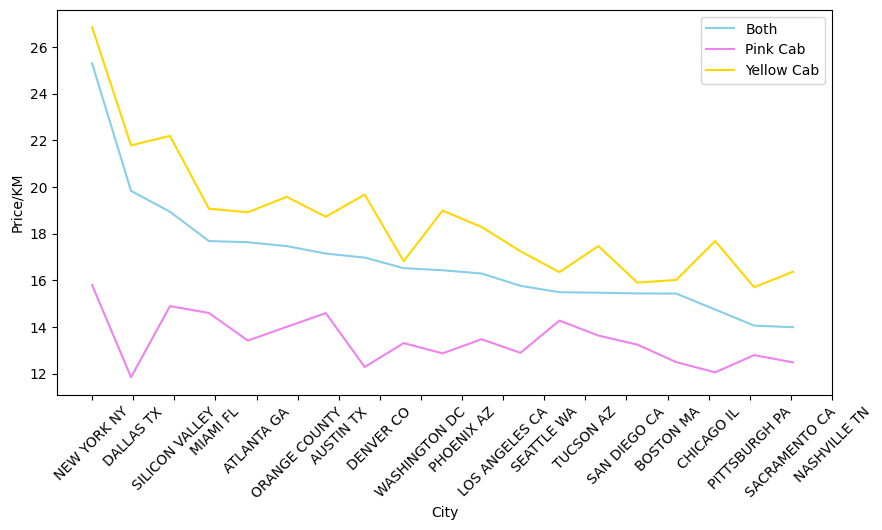

In [293]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 5))

price_city.plot(ax = ax, color=["skyblue", "violet", "gold"])

ax.set_xlabel("City")
ax.set_ylabel("Price/KM")
ax.set_xticks(np.linspace(0, len(price_city.index), len(price_city.index)))
ax.set_xticklabels(price_city.index, rotation = 45)


We can see that for Yellow Cab:

1. NEW YORK NY has a significantly high Price/KM.

2. DALLAS TX and SICILICON VALLY has a moderately high Price/KM.

3. The rest cities have similar Price/KM.

For Pink Cab, all cities have similar Price/KM.

In [306]:
ny_pink = cab_combined.query("City=='NEW YORK NY' and Company=='Pink Cab'")
ny_yellow = cab_combined.query("City=='NEW YORK NY' and Company=='Yellow Cab'")

print(f"In NEW YORK NY, Pink Cab has {ny_pink['KM Travelled'].sum()} total KM Travelled while Yellow Cab has {ny_yellow['KM Travelled'].sum()} KM.")
print(f"Pink Cab has {len(ny_pink)} transactions while Yellow Cab has {len(ny_yellow)} transactions.")

In NEW YORK NY, Pink Cab has 313888.15 total KM Travelled while Yellow Cab has 1913295.42 KM.
Pink Cab has 13870 transactions while Yellow Cab has 85055 transactions.


In NEW YORK NY, despite Pink Cab's Price/KM is around 10 dollars lower than Yellow Cab, Yellow Cab is still at the advantage position.

##### 2. Does monthly total profits have an increasing trend?

In [315]:
monthly_pink = cab_combined.query("Company == 'Pink Cab'").set_index("Date of Travel").groupby(pd.Grouper(freq='M')).sum()["Price Charged"]
monthly_yellow = cab_combined.query("Company == 'Yellow Cab'").set_index("Date of Travel").groupby(pd.Grouper(freq='M')).sum()["Price Charged"]

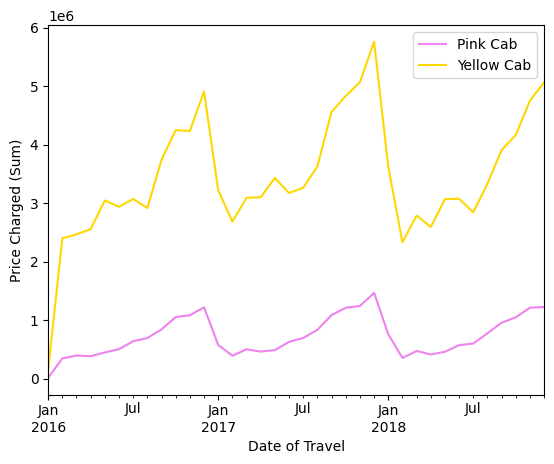

In [321]:
fig, ax = plt.subplots()

monthly_pink.plot(color="Violet", label="Pink Cab")
monthly_yellow.plot(color="Gold", label="Yellow Cab")

ax.set_ylabel("Price Charged (Sum)")
ax.legend()

We cannot say that the profits are constantly increasing, but we find that the profits seem to follow a seasonal change and reach to peak points from September to December (inclusive).

##### 3. Are there any relationships between age and customer number?

In [351]:
customer_age = cab_combined.groupby(["Customer ID", "Company"]).mean()
pink_age = customer_age.query("Company == 'Pink Cab'")["Age"]
yellow_age = customer_age.query("Company == 'Yellow Cab'")["Age"]

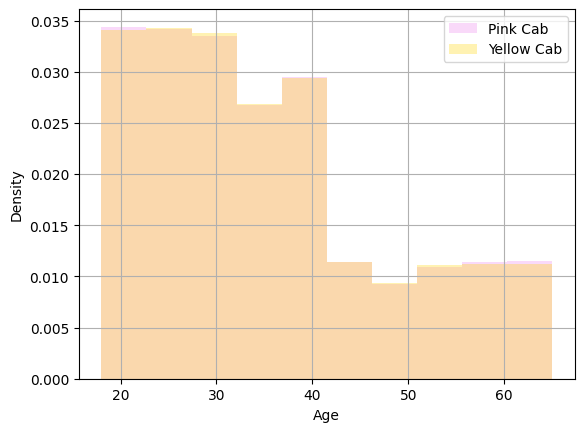

In [362]:
fig, ax = plt.subplots()

pink_age.hist(ax=ax, alpha=0.3, color="Violet", density=True, label="Pink Cab")
yellow_age.hist(ax=ax, alpha=0.3, color="Gold", density=True, label="Yellow Cab")

ax.set_xlabel("Age")
ax.set_ylabel("Density")

ax.legend()

We can see that the companies have similar age groups, and most customers aged less than 40.

##### 5. Does people from different income classes have a preference on which company to use?

In [454]:
customer_income = cab_combined.groupby(["Customer ID", "Company"]).agg({"KM Travelled":"sum", "Income (USD/Month)":"mean"})
pink_income = customer_income.query("Company == 'Pink Cab'")
yellow_income = customer_income.query("Company == 'Yellow Cab'")

blank_income = pd.DataFrame(index=customer_income.reset_index("Company").index.unique())
blank_income["0"] = 0

# Determine which company customers prefer
pink_km_full = pd.merge(blank_income, (pink_income["KM Travelled"].reset_index("Company").drop("Company", axis=1)), on="Customer ID", how="outer").drop("0", axis=1).fillna(0)
yellow_km_full = pd.merge(blank_income, (yellow_income["KM Travelled"].reset_index("Company").drop("Company", axis=1)), on="Customer ID", how="outer").drop("0", axis=1).fillna(0)

income_diff = pink_km_full - yellow_km_full

company_prefer = pd.DataFrame(index=customer_income.reset_index("Company").index.unique())
company_prefer.loc[(income_diff["KM Travelled"]>0), "Company"] = "Pink Cab"
company_prefer.loc[(income_diff["KM Travelled"]<0), "Company"] = "Yellow Cab"

# Update pink_income and yellow_income to those who prefer their company
pink_income = pd.merge(company_prefer[company_prefer["Company"]=="Pink Cab"], pink_income, on="Customer ID", how="inner")
yellow_income = pd.merge(company_prefer[company_prefer["Company"]=="Yellow Cab"], yellow_income, on="Customer ID", how="inner")

# Define class based on income
pink_income_3000 = len(pink_income[pink_income["Income (USD/Month)"] <= 3000])
pink_income_6000 = len(pink_income[pink_income["Income (USD/Month)"] > 3000][pink_income["Income (USD/Month)"] <= 6000])
pink_income_12000 = len(pink_income[pink_income["Income (USD/Month)"] > 6000][pink_income["Income (USD/Month)"] <= 12000])
pink_income_20000 = len(pink_income[pink_income["Income (USD/Month)"] > 12000][pink_income["Income (USD/Month)"] <= 20000])
pink_income_high = len(pink_income[pink_income["Income (USD/Month)"] > 20000])
pink_income_sizes = [pink_income_3000, pink_income_6000, pink_income_12000, pink_income_20000, pink_income_high]
pink_income_labels = ["<3000", "3000~6000", "6000~12000", "12000~20000", ">20000"]

yellow_income_3000 = len(yellow_income[yellow_income["Income (USD/Month)"] <= 3000])
yellow_income_6000 = len(yellow_income[yellow_income["Income (USD/Month)"] > 3000][yellow_income["Income (USD/Month)"] <= 6000])
yellow_income_12000 = len(yellow_income[yellow_income["Income (USD/Month)"] > 6000][yellow_income["Income (USD/Month)"] <= 12000])
yellow_income_20000 = len(yellow_income[yellow_income["Income (USD/Month)"] > 12000][yellow_income["Income (USD/Month)"] <= 20000])
yellow_income_high = len(yellow_income[yellow_income["Income (USD/Month)"] > 20000])
yellow_income_sizes = [yellow_income_3000, yellow_income_6000, yellow_income_12000, yellow_income_20000, yellow_income_high]
yellow_income_labels = ["<3000", "3000~6000", "6000~12000", "12000~20000", ">20000"]

/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_79693/670588255.py:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pink_income_6000 = len(pink_income[pink_income["Income (USD/Month)"] > 3000][pink_income["Income (USD/Month)"] <= 6000])
/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_79693/670588255.py:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pink_income_12000 = len(pink_income[pink_income["Income (USD/Month)"] > 6000][pink_income["Income (USD/Month)"] <= 12000])
/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_79693/670588255.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pink_income_20000 = len(pink_income[pink_income["Income (USD/Month)"] > 12000][pink_income["Income (USD/Month)"] <= 20000])
/var/folders/55/8329xk652qqcmwyx7rj48p6m0000gn/T/ipykernel_79693/670588255.py:32: UserWarning: Boolean Series key will be reindexed to match DataFrame i

Text(0.5, 1.0, 'Pink Cab')

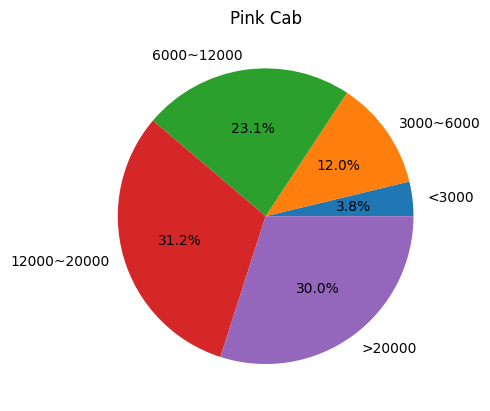

In [458]:
fig, ax = plt.subplots()
ax.pie(pink_income_sizes, labels=pink_income_labels, autopct='%1.1f%%')
ax.set_title("Pink Cab")

Text(0.5, 1.0, 'Yellow Cab')

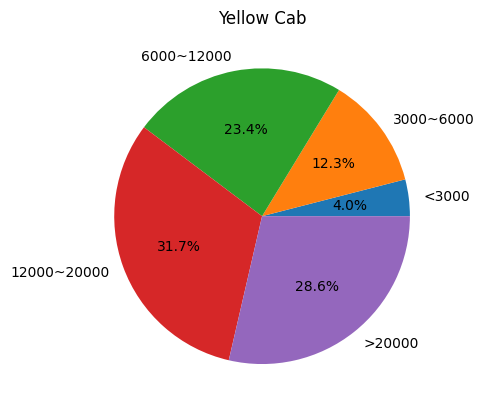

In [459]:
fig, ax = plt.subplots()
ax.pie(yellow_income_sizes, labels=yellow_income_labels, autopct='%1.1f%%')
ax.set_title("Yellow Cab")

From the pie charts above, we can conclude that people choose the companies regardless their income classes.

##### 6. Which payment method is more preferable in each company?